In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *
import time

images = DDGS().images('tiger photos', max_results=1)
urls = [img['image'] for img in images]

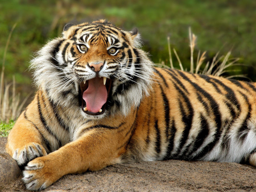

In [2]:
from fastdownload import download_url
dest = 'tiger.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

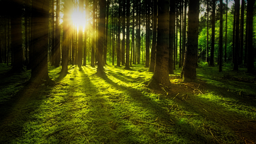

In [3]:
# assuming forest images are already downloaded

for_im = Image.open('forest.jpg')
for_im.to_thumb(256, 256)

In [6]:
# assuming 200 photos of forests are already saved

searches = 'tiger'
path = Path('bird_or_not')

dest = (path/searches)
dest.mkdir(exist_ok=True, parents=True)
more_images = DDGS().images(f'{searches} photo', max_results=200)
more_urls = [img['image'] for img in more_images]
download_images(dest, urls=more_urls)
time.sleep(5)
resize_images(path/searches, max_size=400, dest=path/searches) # downloads, resizes images of tigers

In [7]:
failed = verify_images(get_image_files(path)) # filter out broken images
failed.map(Path.unlink)
len(failed)

4

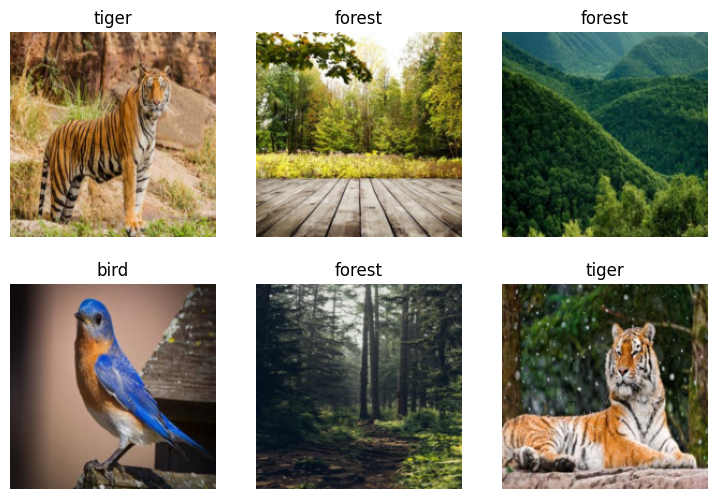

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32) # grabs all images we downloaded, splits into train and test

dls.show_batch(max_n=6) # show a couple of them, classified

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3) # running the computer vision model, and fine tuning.
# as seen below, results are pretty nice!

epoch,train_loss,valid_loss,error_rate,time
0,0.829223,0.011332,0.011765,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.078779,0.004769,0.000000,00:13
1,0.052848,0.004963,0.000000,00:12
2,0.043424,0.003275,0.000000,00:13


In [15]:
is_animal, _, probs = learn.predict(PILImage.create('tiger.jpg'))
print(f"This is a: {is_animal}.") # predict whats in the image

This is a: tiger.


In [16]:
is_animal, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_animal}.")

This is a: bird.


In [17]:
is_animal, _, probs = learn.predict(PILImage.create('forest.jpg')) # incorrectly classifies
print(f"This is a: {is_animal}.")

This is a: bird.
